In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
os.chdir('C:/Users/yogitajagdeep/Desktop/edproject1')

In [6]:
train_data=pd.read_csv("train.csv")

In [7]:
train_data['target']=train_data['target'].astype('category')

In [8]:
train_data = train_data.drop("ID_code", axis=1)

In [14]:
train_data.shape

(175073, 201)

In [10]:
#Missing Value Analysis
missing_val=pd.DataFrame(train_data.isnull().sum())

{'whiskers': [<matplotlib.lines.Line2D at 0x2cee7e28e48>,
 'caps': [<matplotlib.lines.Line2D at 0x2cee7e09518>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cee7e28a20>],
 'medians': [<matplotlib.lines.Line2D at 0x2cee7e09ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cee7e09ef0>],
 'means': []}

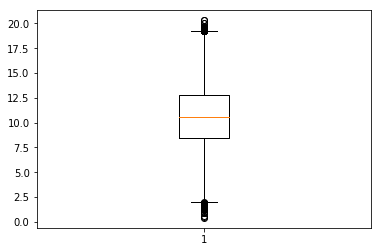

In [11]:
#Outlier Analysis
 #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(train_data['var_0'])

In [12]:
cnames=list(train_data.columns)
cnames=cnames[1:]

In [13]:
for i in cnames:
    q75,q25=np.percentile(train_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-1.5*iqr
    maximum=q75+1.5*iqr
    train_data=train_data.drop(train_data[train_data.loc[:,i]<minimum].index)
    train_data=train_data.drop(train_data[train_data.loc[:,i]>maximum].index)

In [15]:
train_data.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602


In [12]:
#Correlation Analysis
df_corr = train_data.loc[:,cnames]
corr = df_corr.corr()

In [ ]:
#Feature Scaling
for i in cnames:
    maxi=max(train_data[i])
    mini= min(train_data[i])
    rang=maxi-mini
    train_data[i]=train_data[i]-mini
    train_data[i] = train_data[i]/rang

In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
#Divide data into train and test
X = train_data.values[:, ]
Y = train_data.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)